<table align="center" width=100%>
    <tr>
        <td width="15%">
            <img src="house.jpg">
        </td>
        <td>
            <div align="center">
                <font color="#21618C" size=24px>
                    <b>TITANIC SURVIVAL
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>         

## PROBLEM STATEMENT.

The Titanic was a British passenger liner that sank in the North Atlantic Ocean in April 1912 after colliding with an iceberg during its maiden voyage.
The ship had a total of 891 passengers and crew on board, of which 549 died and 342 survived. The survival rate was only 38.4%.
The objective of this problem is to build a model that can use this information to predict whether a given passenger survived or not.
The accuracy of the model is evaluated using a test dataset, which contains data that the model has not seen during training.
The model with the highest accuracy on the test dataset is considered the best model for the Titanic survival problem.

## DATA DEFINATION.

**PassengerId:** A unique identifier for each passenger.

**Survived:**  A binary variable indicating whether the passenger survived or not. (0 = No, 1 = Yes)

**Pclass:** The passenger class. (1 = 1st, 2 = 2nd, 3 = 3rd)

**Name:** The name of the passenger.

**Sex:** The gender of the passenger. (Male or Female)

**Age:** The age of the passenger in years

**SibSp:** The number of siblings or spouses the passenger had aboard the Titanic.

**Parch:** The number of parents or children the passenger had aboard the Titanic.

**Ticket:**  The ticket number of the passenger.

**Fare:** The fare paid by the passenger.

**Cabin:** The cabin number of the passenger.

**Embarked:** The port of embarkation. (C = Cherbourg, Q = Queenstown, S = Southampton)


The dataset contains a total of 891 observations, which represent a sample of the passengers on the Titanic. The goal of the Titanic survival problem is to build a model that can predict whether a given passenger survived or not based on the available variables. 

## Table of Contents

1. **[Import Libraries](#import_lib)**
2. **[Set Options](#set_options)**
3. **[Read Data](#Read_Data)**
4. **[Prepare and Analyze the Data](#data_preparation)**
    - 4.1 - [Understand the Data](#Data_Understanding)
        - 4.1.1 - [Data Type](#Data_Types)
        - 4.1.2 - [Summary Statistics](#Summary_Statistics)
        - 4.1.3 - [Distribution of Variables](#distribution_variables)
        - 4.1.4 - [Missing Values](#Missing_Values)
        - 4.1.5 - [Data Preparation](#Data_Preparation)
        - 4.2.1 - [Check for Normality](#Normality)
        - 4.2.2 - [Dummy Encode the Categorical Variables](#dummy)
5. **[Model Building Start](#BuildingModel)**
    - 5.1 - [LogisticRegression](#LogisticRegression)
    - 5.2 - [Knn Model](#KNearestNeigbour)
    - 5.3 - [Decision Tree](#DecisionTree)
    - 5.4 - [Random Forest](#RF_model)
6. **[Conclusion](#conclusion)**

<a id='import_lib'></a>
# 1. Import Libraries

<table align="left">
    <tr>
        <td width="8%">
            <img src="todo.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>Importing only the required libraries and functions</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [160]:
## We use 'Numpy'for mathematical operations on large, multi-dimensional arrays and matrices
# 'Pandas' is used for data manipulation and analysis
import numpy as np
import pandas as pd

# 'Matplotlib' is a data visualization library for 2D and 3D plots
import matplotlib.pyplot as plt

# seaborn is used for plotting statistical graphics
import seaborn as sns

# 'Scikit-learn' importing required library.
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

# import functions to perform logistic regression
import statsmodels
import statsmodels.api as sm


In [161]:
# suppress the warnings 
from warnings import filterwarnings
filterwarnings('ignore')

# set the plot size using 'rcParams'
# once the plot size is set using 'rcParams', it sets the size of all the forthcoming plots in the file
# 15 and 8 are width and height in inches respectively
plt.rcParams['figure.figsize'] = [15,8]

<a id='set_options'></a>
# 2. Set Options

<table align="left">
    <tr>
        <td width="8%">
            <img src="todo.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>
1. Display complete data frames<br>
2. To avoid the exponential number<br>
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [162]:
# display all columns of the dataframe
pd.options.display.max_columns = None

# display all rows of the dataframe
pd.options.display.max_rows = None

# use below code to convert the 'exponential' values to float
np.set_printoptions(suppress=True)

<a id='Read_Data'></a>
# 3. Read Data

In [163]:
titanic_data=pd.read_csv(r'D:\data laptop\Logistic-Regression-main\titanic_train.csv')

**View the data using head function which returns top  rows**

In [164]:
# "df.head()" means checking the top five rows.
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [165]:
#Checking the shape of dataframe.
titanic_data.shape

(891, 12)

In [166]:
#Checking the types of column.
titanic_data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [167]:
#Checking the information of the dataframe
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [168]:
#Checking the datatypes
titanic_data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [169]:
#Statistical summary.
titanic_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [170]:
titanic_data.describe(include='object')

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


**Checking Missing Value**

In [171]:
titanic_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

As we see missing values are present in "Age","Cabin" and "Embarked"

**Visualizing the Missing Value**

<AxesSubplot:>

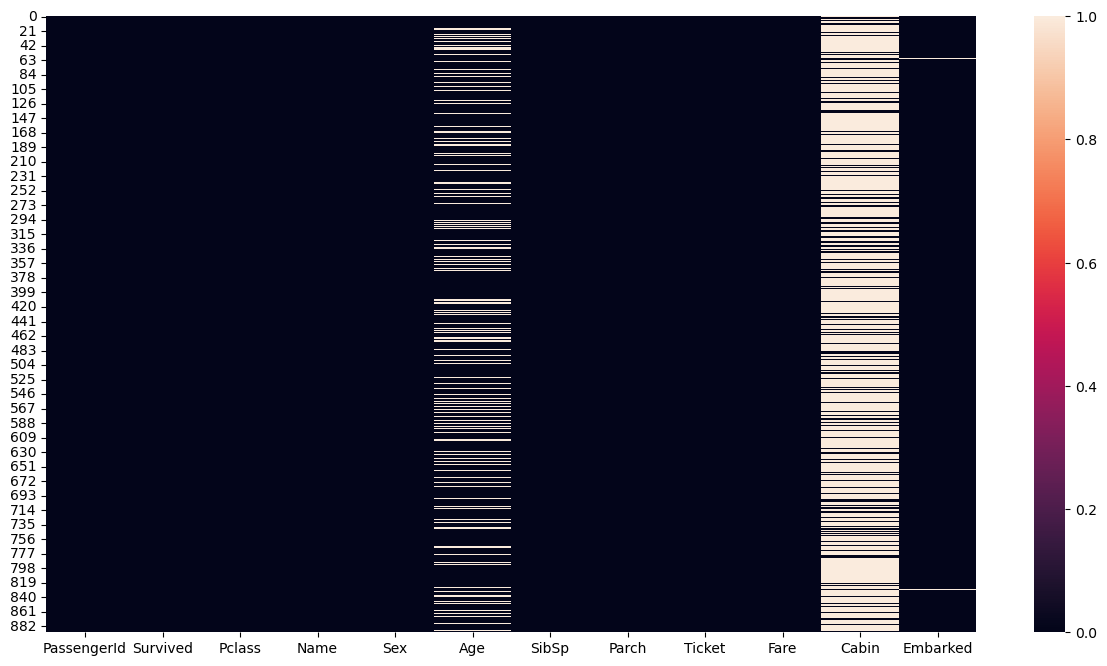

In [172]:
sns.heatmap(titanic_data.isna())

**Missing Value Treatment**

In [173]:
#Applying 'fillna()' and replace the missing values by its mean,
#where 'inplace=True' means Permanently Changed
titanic_data['Age'].fillna(titanic_data['Age'].mean(),inplace=True)

In [174]:
#Applying 'fillna()' on Embarked column to remove its misssing values,replacing it with mode.
titanic_data['Embarked']=titanic_data['Embarked'].fillna("S")

<table align="left">
    <tr>
        <td width="8%">
            <img src="infer.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>We can see 'CABIN' column has a high number of null values, as such we can not use it for prediction. Hence we will drop it.</br></b>
                </font>
            </div>
        </td>
    </tr>
</table>


In [175]:
titanic_data.drop('Cabin',inplace=True,axis=1)

<AxesSubplot:>

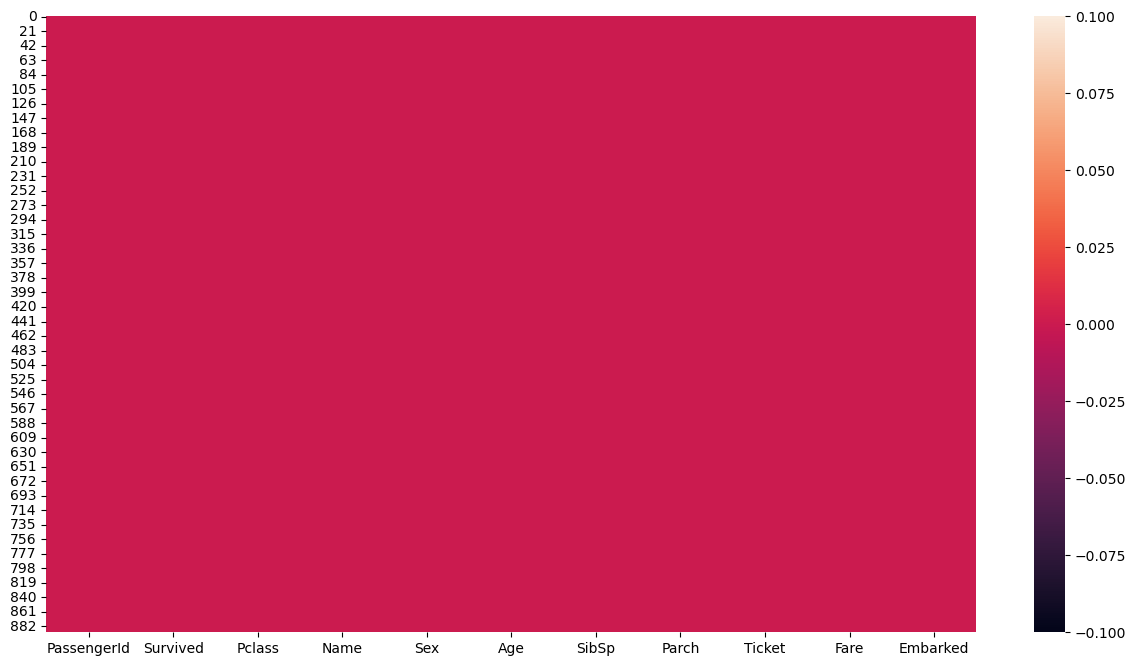

In [176]:
#Again Visualizing the map.
sns.heatmap(titanic_data.isna())

**Again checking for Missing Value after doing some transformation.**

In [177]:
titanic_data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

**Again displaying the dataframe**

In [178]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


<table align="left">
    <tr>
        <td width="8%">
            <img src="infer.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>Now, It is necessary to convert all columns to numeric. Please note this is required for feeding data into model. Lets see which columns are non numeric info describe method.</br></b>
                </font>
            </div>
        </td>
    </tr>
</table>


In [179]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


<table align="left">
    <tr>
        <td width="8%">
            <img src="infer.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>We can see Name, Sex, Ticket and Embarked are non-numerical and also PassengerId column too.It seems PassengerId, Name,Embarked and Ticket number are not useful for Prediction hence we will eventually drop it.Before doing this we can create a copy of our dataframe for future safety.</br></b>
                </font>
            </div>
        </td>
    </tr>
</table>


In [180]:
#Creating a copy of the dataframe.
titanic_new=titanic_data.copy()

#Displaying the copied data frame
#Displaying only the top five head of the dataframe.
titanic_new.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


<table align="left">
    <tr>
        <td width="8%">
            <img src="infer.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>As we can see that our data is been successfully copied.Now, we can continue our dropping part.</br></b>
                </font>
            </div>
        </td>
    </tr>
</table>


**Dropping the unwanted columns.**

In [181]:
titanic_new.drop(['PassengerId','Name','Ticket','SibSp','Parch','Embarked'],axis=1,inplace=True)
titanic_new.head()

,Survived,Pclass,Sex,Age,Fare
0,0,3,male,22.0,7.2500
1,1,1,female,38.0,71.2833
2,1,3,female,26.0,7.9250
3,1,1,female,35.0,53.1000
4,0,3,male,35.0,8.0500


<a id='Read_Data'></a>
#  Visualizing the insight our new dataframe

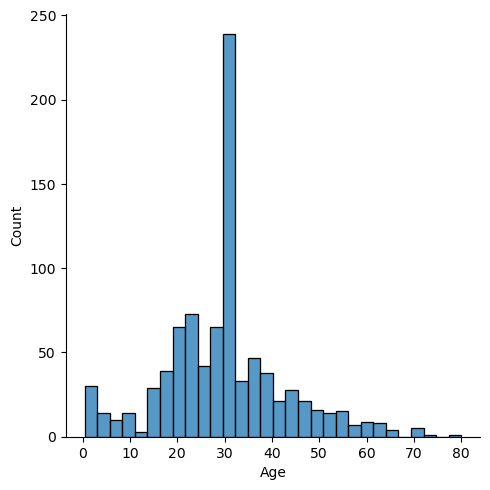

In [182]:
#find the distribution for the age column
sns.displot(x='Age',data=titanic_new)

**Male vs Female Survival**

<AxesSubplot:xlabel='Survived', ylabel='count'>

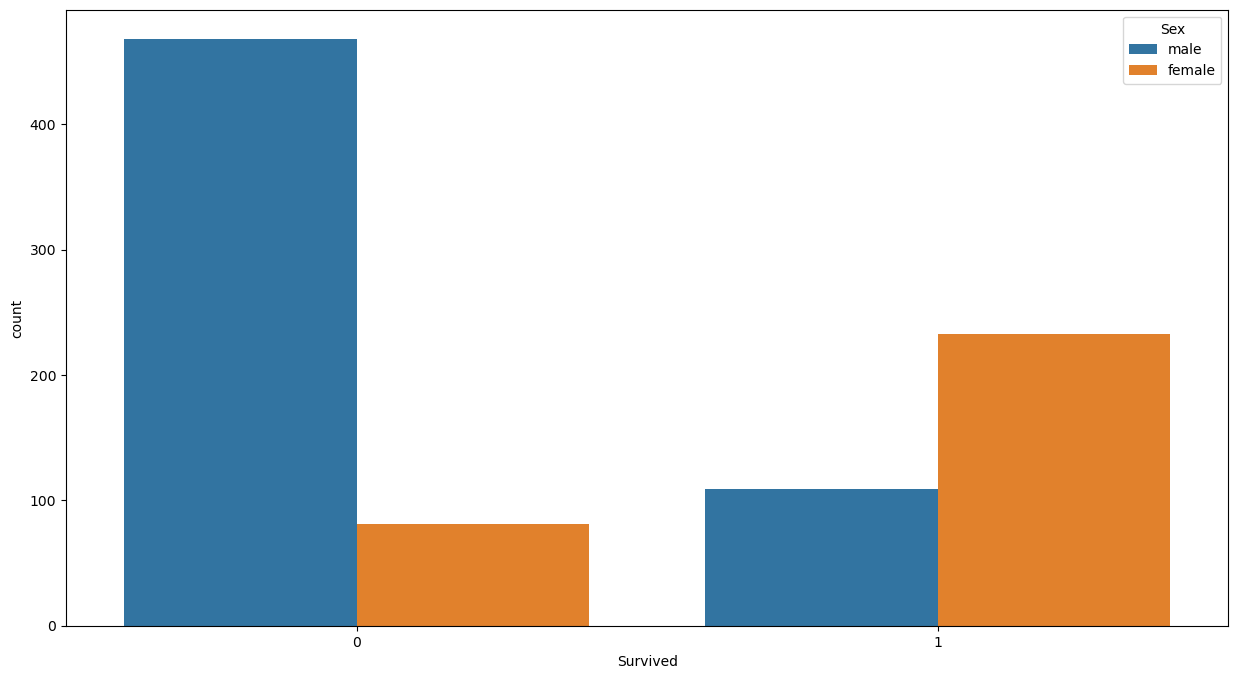

In [183]:
sns.countplot(x='Survived',data=titanic_new,hue='Sex')

After seeing this we can now analyze that Female survived more than Male.
Male died more than female.

**Find out how many survived vs Died using countplot**

<AxesSubplot:xlabel='Survived', ylabel='count'>

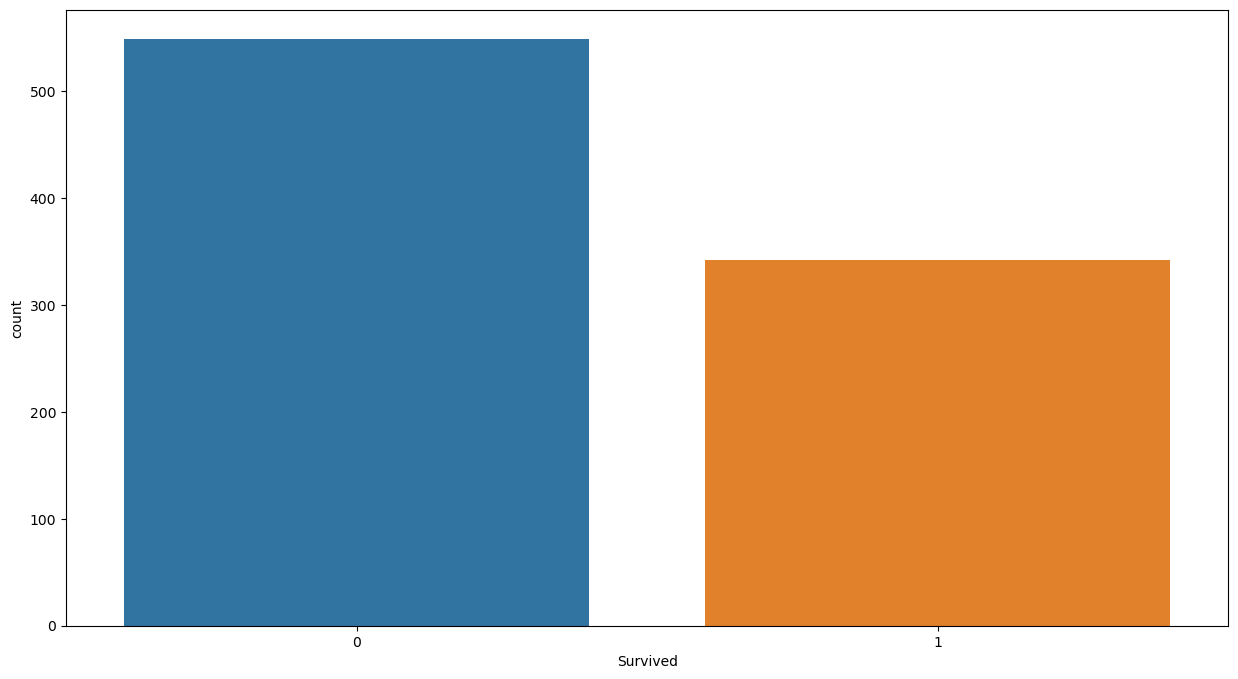

In [184]:
sns.countplot(x='Survived',data=titanic_new)

we get that but for the percentage we are going to plot a pieplot 

<AxesSubplot:xlabel='Fare', ylabel='count'>

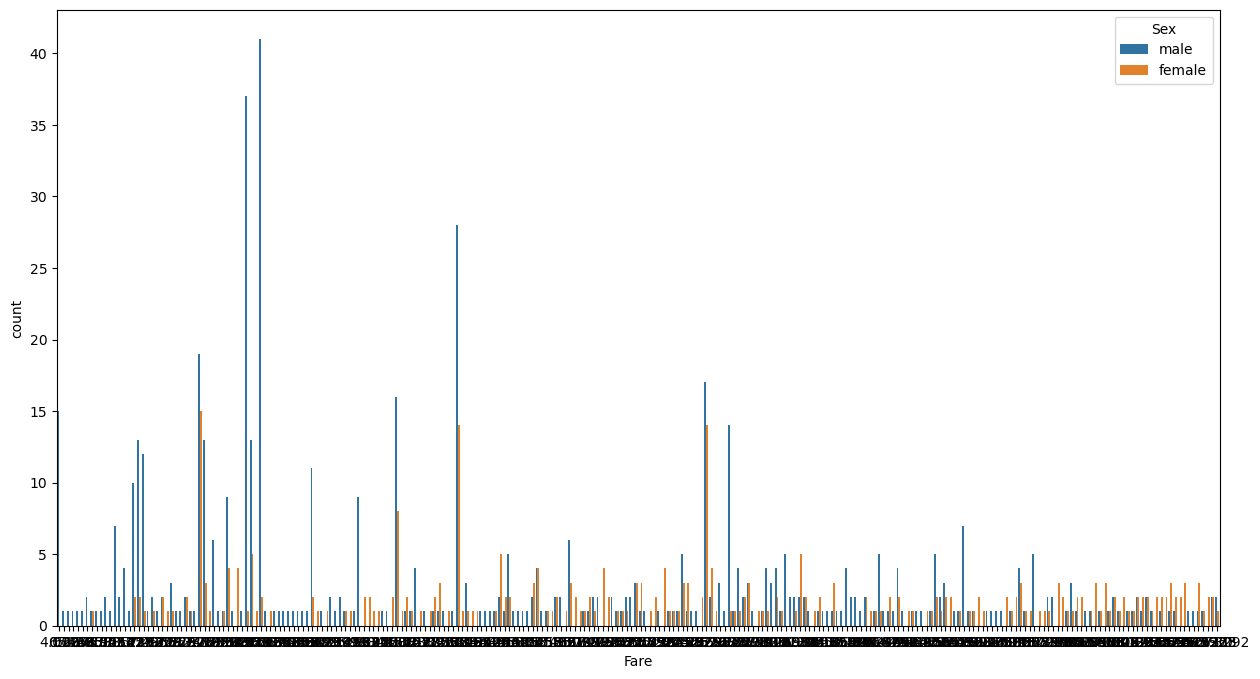

In [185]:
sns.countplot(x='Fare',data=titanic_new,hue='Sex')

In [186]:
# Calculate the number of survivors
survived = titanic_new['Survived'].value_counts()

In [187]:
survived

0    549
1    342
Name: Survived, dtype: int64

As we can see 549 people died and only 342 people survived,with this information we are plot a pie plot.

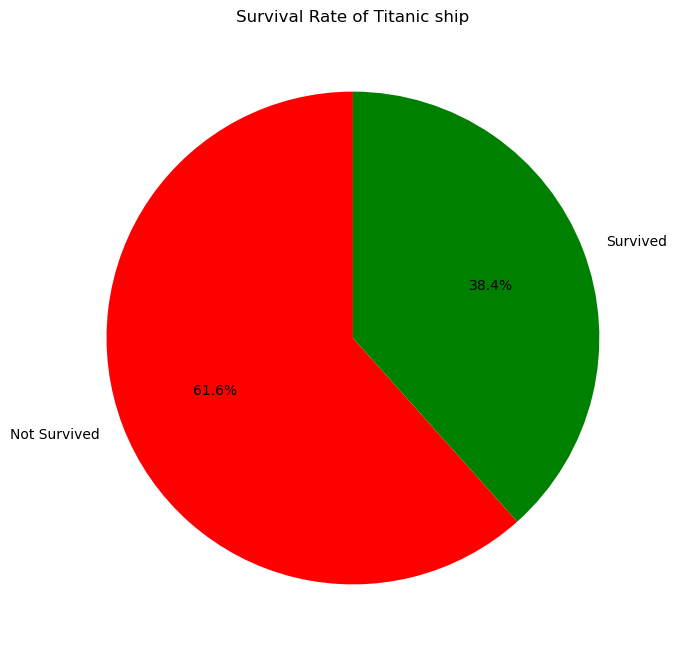

In [188]:
# Create a pie chart
labels = ['Not Survived', 'Survived']
colors = ['red', 'green']
plt.pie(survived, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)

# Add a title
plt.title('Survival Rate of Titanic ship')

# Show the chart
plt.show()

**Defining Dependent and Independent Variable**

In [321]:
X = titanic_new.drop(["Survived"],axis="columns")
y = titanic_new.Survived

**Applying get dummies function only on 'Sex'**

In [322]:
dummies = pd.get_dummies(X.Sex)
dummies.head()

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1


**Adding Dummies Column to the Dataframe**

In [323]:
#Using 'Concat()' function to add dummies to 'X'.
X = pd.concat([X,dummies],axis="columns")
X


,Pclass,Sex,Age,Fare,female,male
0,3,male,22.000000,7.2500,0,1
1,1,female,38.000000,71.2833,1,0
2,3,female,26.000000,7.9250,1,0
3,1,female,35.000000,53.1000,1,0
4,3,male,35.000000,8.0500,0,1
5,3,male,29.699118,8.4583,0,1
6,1,male,54.000000,51.8625,0,1
7,3,male,2.000000,21.0750,0,1
8,3,female,27.000000,11.1333,1,0
9,2,female,14.000000,30.0708,1,0


**Dropping Sex Column after getting Dummies Value for Male and Female**

In [324]:
X.drop(["Sex"],axis="columns",inplace=True)
X.head()

,Pclass,Age,Fare,female,male
0,3,22.0,7.2500,0,1
1,1,38.0,71.2833,1,0
2,3,26.0,7.9250,1,0
3,1,35.0,53.1000,1,0
4,3,35.0,8.0500,0,1


#### Create a generalized function to calculate the metrics for the test set.

In [325]:
def get_test_report(model):
    return(classification_report(y_test,y_pred))

#### Create a generalized function to calculate the kappa score for the test set.

In [326]:
def kappa_score(model):
    return(cohen_kappa_score(y_test,y_pred))

#### Define a function to plot the confusion matrix.

In [327]:
# define a to plot a confusion matrix for the model
def plot_confusion_matrix(model):
    
    # create a confusion matrix
    # pass the actual and predicted target values to the confusion_matrix()
    cm = confusion_matrix(y_test, y_pred)

    # label the confusion matrix  
    # pass the matrix as 'data'
    # pass the required column names to the parameter, 'columns'
    # pass the required row names to the parameter, 'index'
    conf_matrix = pd.DataFrame(data = cm,columns = ['Predicted:0','Predicted:1'],
                               index = ['Actual:0','Actual:1'])
     # plot a heatmap to visualize the confusion matrix
    # 'annot' prints the value of each grid 
    # 'fmt = d' returns the integer value in each grid
    # 'cmap' assigns color to each grid
    # as we do not require different colors for each grid in the heatmap,
    # use 'ListedColormap' to assign the specified color to the grid
    # 'cbar = False' will not return the color bar to the right side of the heatmap
    # 'linewidths' assigns the width to the line that divides each grid
    # 'annot_kws = {'size':25})' assigns the font size of the annotated text 
    sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = ListedColormap(['lightskyblue']),
                cbar = False, linewidths = 0.1, annot_kws = {'size':25})

    # set the font size of x-axis ticks using 'fontsize'
    plt.xticks(fontsize = 20)

    # set the font size of y-axis ticks using 'fontsize'
    plt.yticks(fontsize = 20)

    # display the plot
    plt.show()


#### Define a function to plot the ROC curve.

In [328]:
def plot_roc(model):
    fpr,tpr,_=roc_curve(y_test,y_pred_prob)
    plt.plot(fpr,tpr)
    plt.xlim([0.0,1.0])
    plt.ylim([0.0,1.0])
    plt.plot([0,1],[0,1],'r--')
    
    plt.title('ROC Curve for Titanic Survival',fontsize=15)
    plt.xlabel('False positive rate (1-Specificity)',fontsize=15)
    plt.ylabel('True positive rate (Sensitivity)',fontsize=15)
    
    plt.text(x=0.02,y=0.9,s=('AUC Score:',round(roc_auc_score(y_test,y_pred_prob),4)))
    plt.grid(True)

#### Create a generalized function to create a dataframe containing the scores for the models.

In [329]:
score_card=pd.DataFrame(columns=['Model','AUC Score','Precision Score','Recall Score',
                                'Accuracy Score','Kappa Score','f1-score'])
score_card=pd.DataFrame(columns=['Model','AUC Score','Precision Score','Recall Score','Accuracy score','Kappa Score','f1-score'])
def update_score_card(model_name):
    global score_card
    score_card=score_card.append({'Model': model_name,'AUC Score':roc_auc_score(y_test,y_pred_prob),'Precision Score': metrics.precision_score(y_test,y_pred),'Recall Score':metrics.recall_score(y_test,y_pred),'Accuracy score': metrics.accuracy_score(y_test,y_pred),'Kappa Score': cohen_kappa_score(y_test,y_pred),'f1-score':metrics.f1_score(y_test,y_pred)},ignore_index=True)
    return(score_card)

<a id='LogisticReg'></a>
# 5. Logistic Regression 

Logistic regression is one of the techniques used for classification. The estimates of the parameters are obtained by maximizing the likelihood function.

<a id='withStatsModels'></a>
## 5.1 Logistic Regression.

<table align="left">
    <tr>
        <td width="8%">
            <img src="todo.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>To build the logistic model using Statsmodel, we do the following: <br><br>
                       1. Introduce the intercept term<br>
                       2. Split the data into training and test sets<br> 
                       3. Build the model<br>
                       4. Do predictions on the test set <br>
                       5. Compute accuracy measures <br>
                       6. Tabulate the results</b>
                </font>
            </div>
        </td>
    </tr>
</table>

**1. Introduce the intercept term**

Statmodels logistic regression function (Logit) does not include the intercept term by default. Thus, we add the intercept column in the dataframe including features.

In [330]:
# add the intercept column using 'add_constant()'
X = sm.add_constant(X)

# print the first five oservations after adding intercept
X.head()

,const,Pclass,Age,Fare,female,male
0,1.0,3,22.0,7.2500,0,1
1,1.0,1,38.0,71.2833,1,0
2,1.0,3,26.0,7.9250,1,0
3,1.0,1,35.0,53.1000,1,0
4,1.0,3,35.0,8.0500,0,1


**2. Split the dataset into train and test sets**

In [331]:
#split data into train subset and test subset
# set 'random_state' to generate the same dataset each time you run the code 
# 'test_size' returns the proportion of data to be included in the test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 10)

# check the dimensions of the train & test subset using 'shape'
# print dimension of train set
print("X_train",X_train.shape)
print("y_train",y_train.shape)

# print dimension of test set
print("X_test",X_test.shape)
print("y_test",y_test.shape)

X_train (623, 6)
y_train (623,)
X_test (268, 6)
y_test (268,)


#### 3. Build a logistic regression model.

In [332]:
# build the model on train data (X_train and y_train)
# use fit() to fit the logistic regression model
log_reg_model = LogisticRegression() #(y_train, X_train).fit()
log_reg_model.fit(X_train,y_train)

LogisticRegression()

**Interpretation:** The `Pseudo R-squ.` obtained from the above model summary is the value of `McFadden's R-squared`.

**4. Do predictions on the test set**

In [333]:
# let 'y_pred_prob' be the predicted values of y
y_pred_prob= log_reg_model.predict(X_test)

# print the y_pred_prob
y_pred_prob

array([0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 1], dtype=int64)

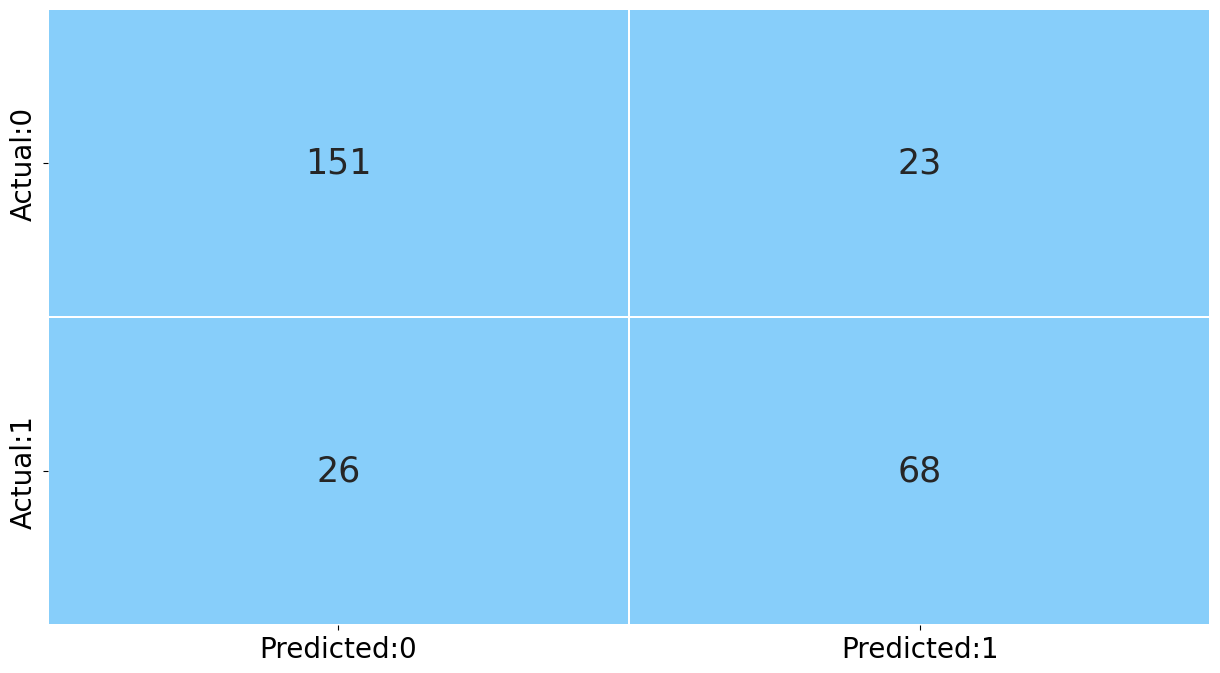

In [334]:
from matplotlib.colors import ListedColormap
# call the function to plot the confusion matrix
# pass the decision tree model to the function
plot_confusion_matrix(log_reg_model)

In [335]:
test_report=get_test_report(log_reg_model)

print(test_report)

              precision    recall  f1-score   support

           0       0.85      0.87      0.86       174
           1       0.75      0.72      0.74        94

    accuracy                           0.82       268
   macro avg       0.80      0.80      0.80       268
weighted avg       0.82      0.82      0.82       268



In [336]:
kappa_value=kappa_score(log_reg_model)
print(kappa_value)

0.595590046809559


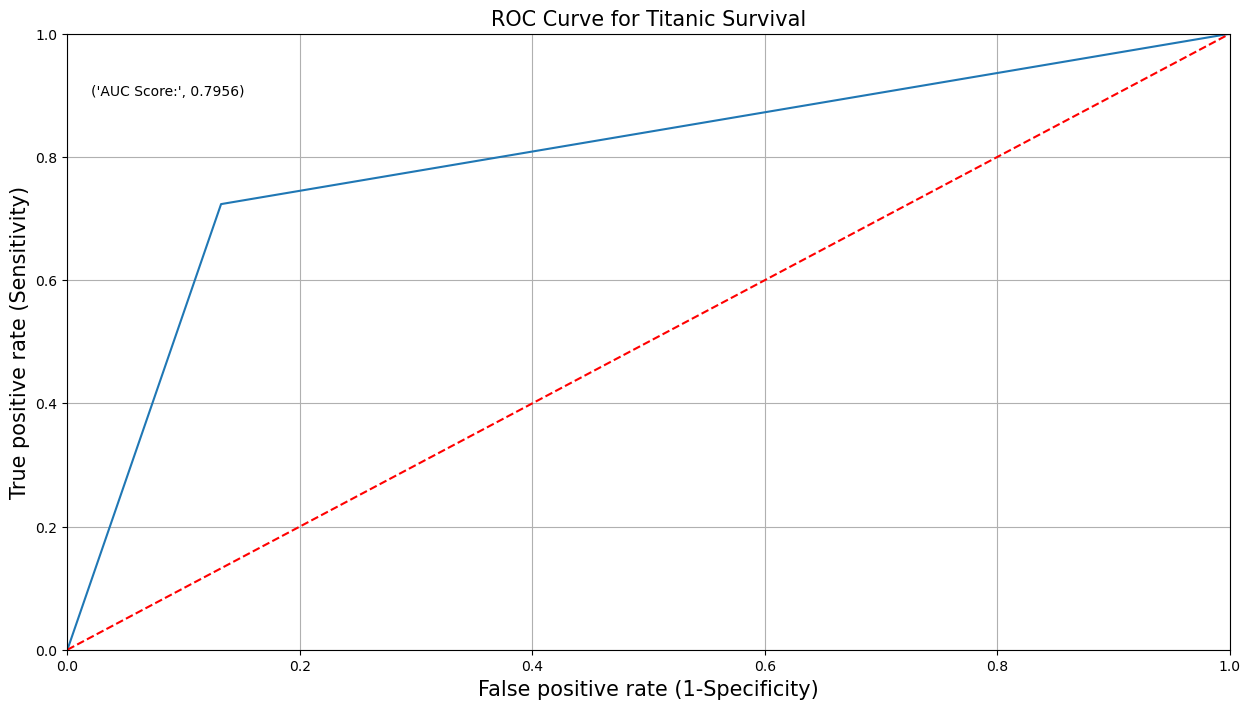

In [337]:
plot_roc(log_reg_model)

**6. Tabulate the results.**

Now, we tabulate the results, so that is easy for us to compare the models built.

In [338]:
update_score_card(model_name='Logistic Regression')

,Model,AUC Score,Precision Score,Recall Score,Accuracy score,Kappa Score,f1-score
0,Logistic Regression,0.79561,0.747253,0.723404,0.817164,0.59559,0.735135


<a id='LogisticReg'></a>
# 5.2. KNN Model. 

In [339]:
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)

KNeighborsClassifier()

In [340]:
# Use the trained random forest to make predictions on the testing set
y_pred_prob = knn_model.predict(X_test)
y_pred_prob

array([0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 1], dtype=int64)

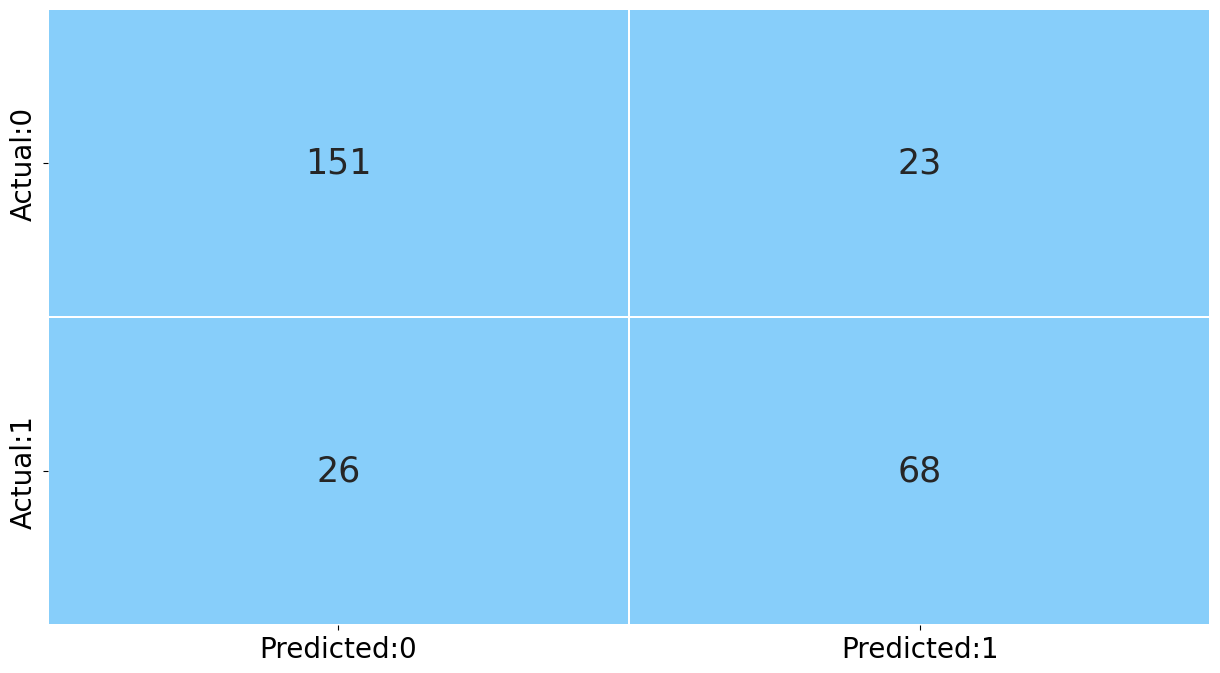

In [341]:
# call the function to plot the confusion matrix
# pass the Random forest model to the function
plot_confusion_matrix(knn_model)

In [342]:
#test report of random forest model.
test_report=get_test_report(knn_model)

print(test_report)

              precision    recall  f1-score   support

           0       0.85      0.87      0.86       174
           1       0.75      0.72      0.74        94

    accuracy                           0.82       268
   macro avg       0.80      0.80      0.80       268
weighted avg       0.82      0.82      0.82       268



In [343]:
# compute kappa score on test set
# call the function 'kappa_score'
kappa_value = kappa_score(knn_model)

# print the kappa value
print(kappa_value)

0.595590046809559


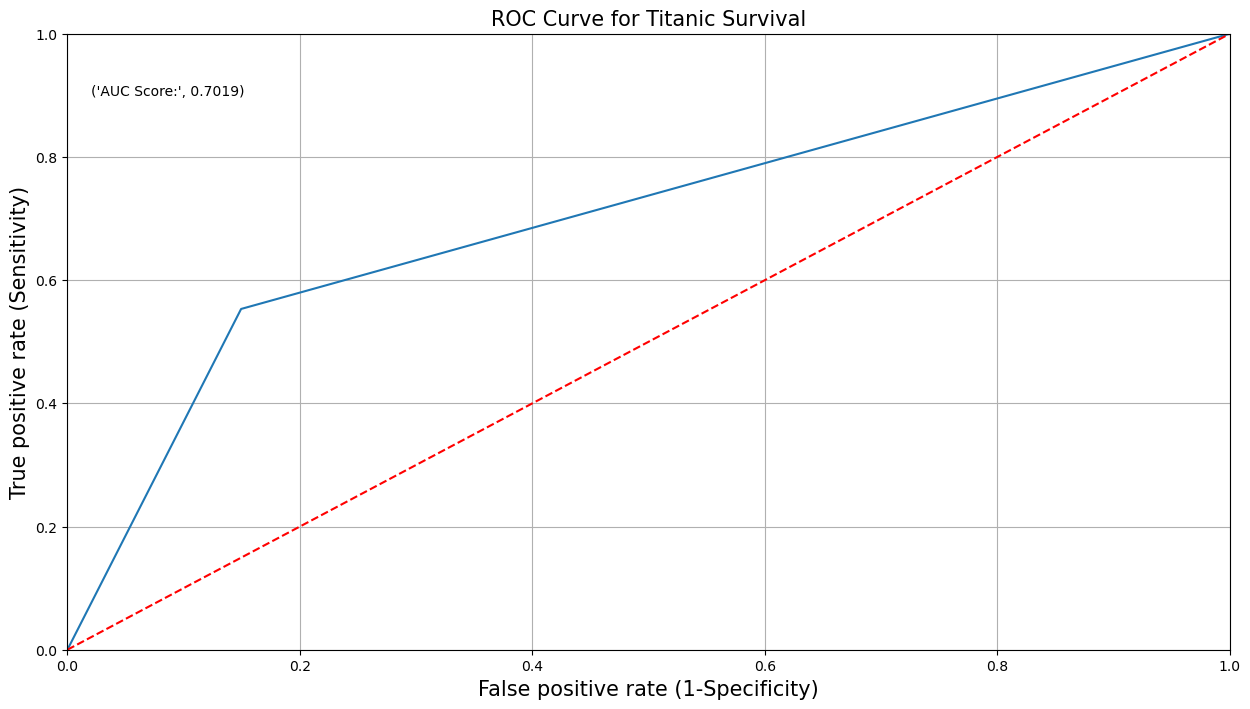

In [344]:
# call the function 'plot_roc' to plot the ROC curve
# pass the Random forest model to the function
plot_roc(knn_model)

<table align="left">
    <tr>
        <td width="8%">
            <img src="infer.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>The dotted line represents the ROC curve of a purely random classifier; a good classifier stays as far away from that line as possible (toward the top-left corner).<br><br>
We see our classifier (KNN) to be away from the dotted line with the AUC score 0.7956.</b>
                </font>
            </div>
        </td>
    </tr>
</table>


**Tabulate the Results**

In [345]:
update_score_card(model_name='KNN_Classifier')

,Model,AUC Score,Precision Score,Recall Score,Accuracy score,Kappa Score,f1-score
0,Logistic Regression,0.795610,0.747253,0.723404,0.817164,0.59559,0.735135
1,KNN_Classifier,0.701883,0.747253,0.723404,0.817164,0.59559,0.735135



<table align="left">
    <tr>
        <td width="8%">
            <img src="infer.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>demonstrate the performance of the two models in terms of their ability to correctly classify instances, discriminate between positive and negative samples, and agree with the actual classifications. The Logistic Regression model generally outperforms the KNN Classifier model in most evaluation metrics, including precision, recall, accuracy, Kappa score, and F1-score.</b>
                </font>
            </div>
        </td>
    </tr>
</table>


**Moving towards Next Model building with Random Forest.**

<a id='LogisticReg'></a>
# 5.3. Random Forest. 

In [346]:
# Choose hyperparameters for the random forest
n_estimators = 100
max_depth = 5

In [347]:
# Create a random forest classifier and fit it to the training data
rf_model = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, random_state=42)

In [348]:
# Use the trained random forest to make predictions on the testing set
y_pred_prob = rf_model.predict(X_test)
y_pred_prob

array([0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0,
       0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 1], dtype=int64)

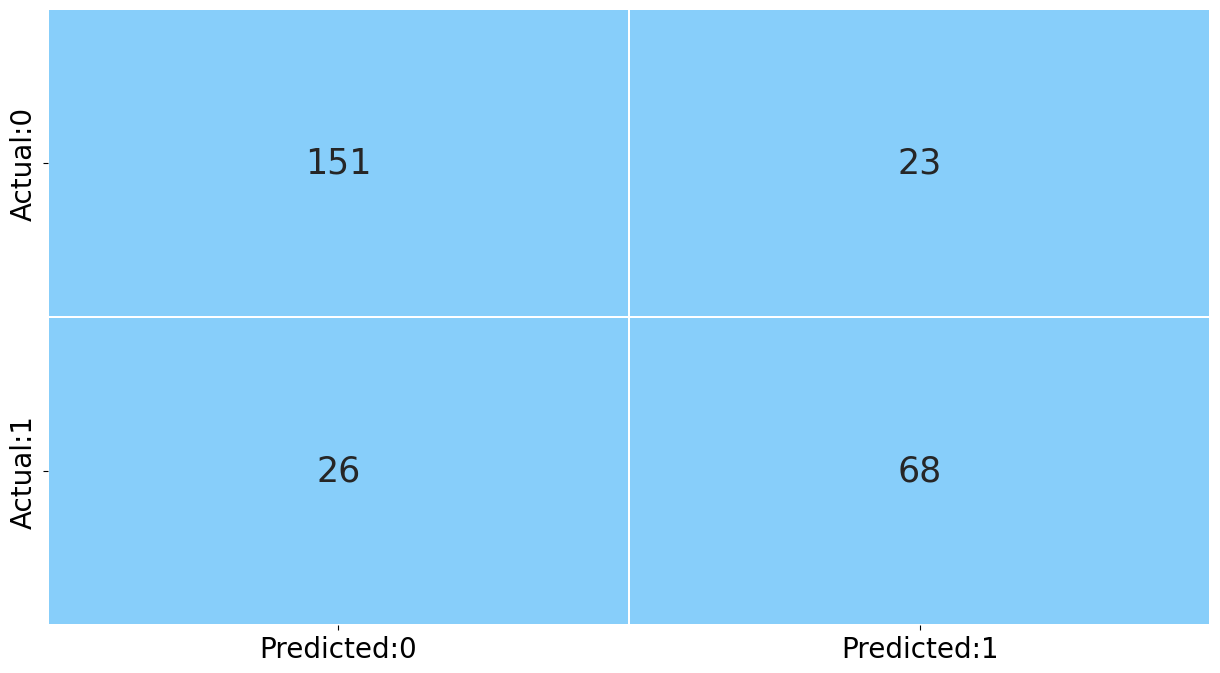

In [349]:
# call the function to plot the confusion matrix
# pass the Random forest model to the function
plot_confusion_matrix(rf_model)

In [350]:
#test report of random forest model.
test_report=get_test_report(rf_model)

print(test_report)

              precision    recall  f1-score   support

           0       0.85      0.87      0.86       174
           1       0.75      0.72      0.74        94

    accuracy                           0.82       268
   macro avg       0.80      0.80      0.80       268
weighted avg       0.82      0.82      0.82       268



In [351]:
# compute kappa score on test set
# call the function 'kappa_score'
kappa_value = kappa_score(rf_model)

# print the kappa value
print(kappa_value)

0.595590046809559


**Interpretation:** As the kappa score for the Random Forest is 0.6323, we can say that there is moderate agreement between the actual and predicted values.

**Plot the ROC curve.**

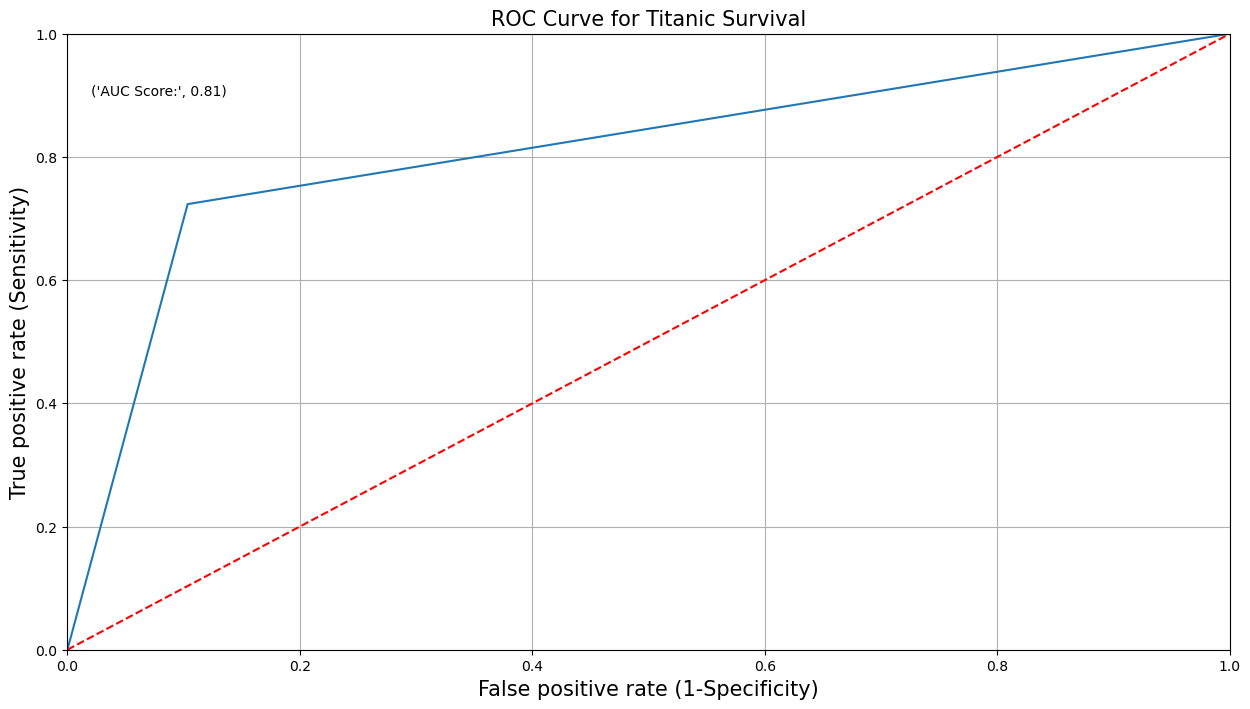

In [352]:
# call the function 'plot_roc' to plot the ROC curve
# pass the Random forest model to the function
plot_roc(rf_model)

<table align="left">
    <tr>
        <td width="8%">
            <img src="infer.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>The dotted line represents the ROC curve of a purely random classifier; a good classifier stays as far away from that line as possible (toward the top-left corner).<br><br>
We see our classifier (Random Forest) to be away from the dotted line with the AUC score 0.7948.</b>
                </font>
            </div>
        </td>
    </tr>
</table>


**6. Tabulate the results.**

Now, we tabulate the results, so that is easy for us to compare the models built.

In [353]:
update_score_card(model_name='Random Forest_Classifier')

,Model,AUC Score,Precision Score,Recall Score,Accuracy score,Kappa Score,f1-score
0,Logistic Regression,0.795610,0.747253,0.723404,0.817164,0.59559,0.735135
1,KNN_Classifier,0.701883,0.747253,0.723404,0.817164,0.59559,0.735135
2,Random Forest_Classifier,0.809978,0.747253,0.723404,0.817164,0.59559,0.735135


<a id='LogisticReg'></a>
# 5.4 Decision Tree.<a id='LogisticReg'></a>

In [354]:
# Choose hyperparameters for the decision tree
max_depth = 5

In [355]:
# Create a decision tree classifier and fit it to the training data
dt_model = DecisionTreeClassifier(max_depth=max_depth, random_state=42)

#fitting the model.
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, random_state=42)

In [356]:
# Use the trained decision tree to make predictions on the testing set
y_pred_prob = dt_model.predict(X_test)
y_pred_prob

array([0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0,
       0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 0, 1, 1], dtype=int64)

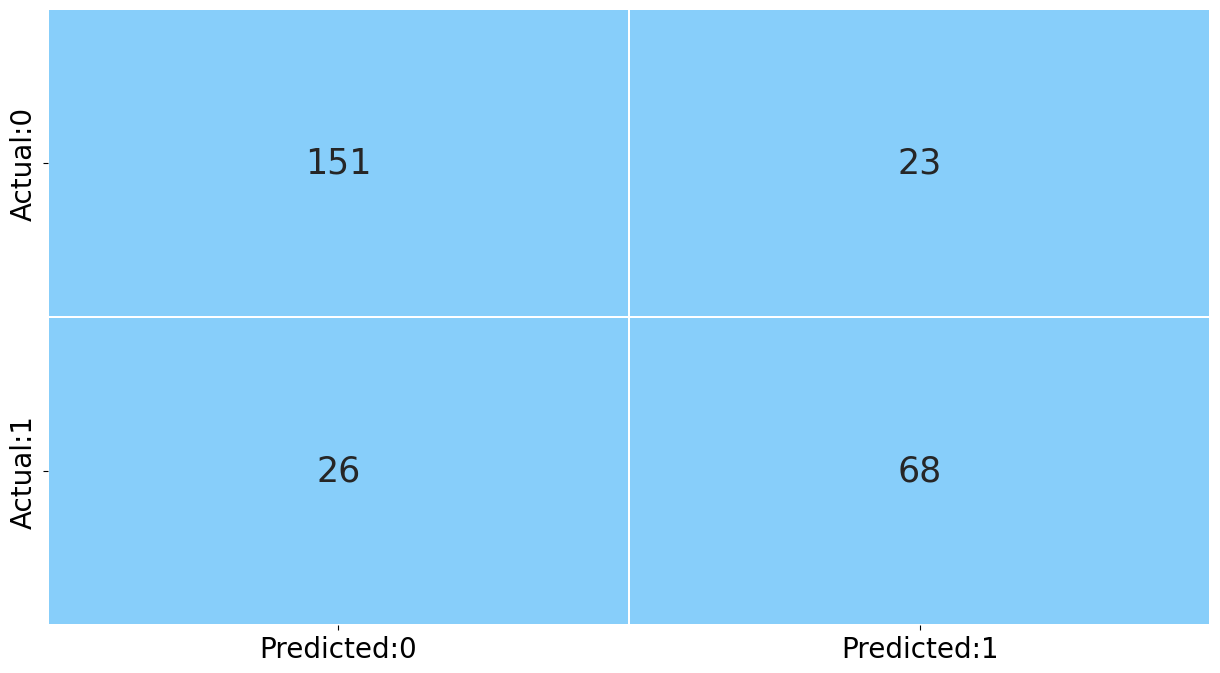

In [357]:
# call the function to plot the confusion matrix
# pass the decision tree model to the function
plot_confusion_matrix(dt_model)

In [358]:
test_report=get_test_report(dt_model)

print(test_report)

              precision    recall  f1-score   support

           0       0.85      0.87      0.86       174
           1       0.75      0.72      0.74        94

    accuracy                           0.82       268
   macro avg       0.80      0.80      0.80       268
weighted avg       0.82      0.82      0.82       268



In [359]:
# compute kappa score on test set
# call the function 'kappa_score'
kappa_value = kappa_score(dt_model)

# print the kappa value
print(kappa_value)

0.595590046809559


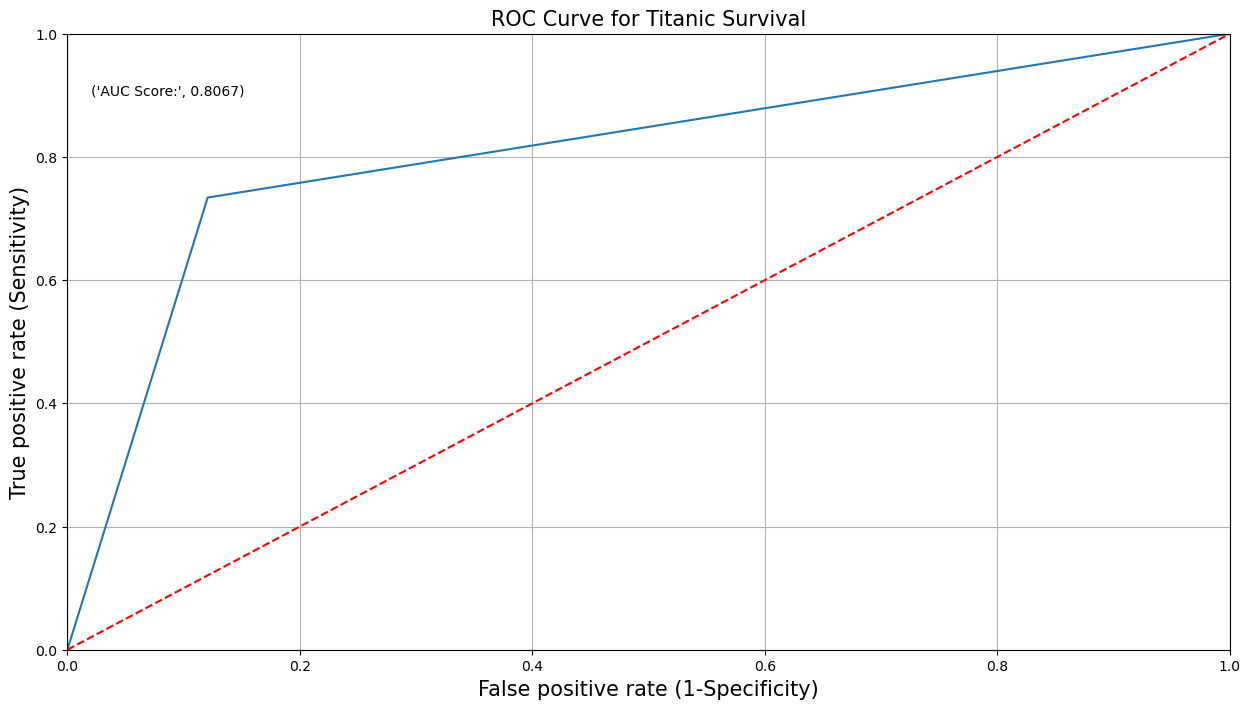

In [360]:
# call the function 'plot_roc' to plot the ROC curve
plot_roc(dt_model)

In [361]:
update_score_card(model_name='Decision Tree Classifier')

,Model,AUC Score,Precision Score,Recall Score,Accuracy score,Kappa Score,f1-score
0,Logistic Regression,0.795610,0.747253,0.723404,0.817164,0.59559,0.735135
1,KNN_Classifier,0.701883,0.747253,0.723404,0.817164,0.59559,0.735135
2,Random Forest_Classifier,0.809978,0.747253,0.723404,0.817164,0.59559,0.735135
3,Decision Tree Classifier,0.806676,0.747253,0.723404,0.817164,0.59559,0.735135


<a id='LogisticReg'></a>
# 6 Conclusion. 


<table align="left">
    <tr>
        <td width="8%">
            <img src="infer.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b> The logistic regression, random forest classifier, and decision tree classifier models show similar performance across all evaluation metrics, including AUC score, precision score, recall score, accuracy score, kappa score, and F1-score. These metrics suggest that the models have comparable predictive capabilities.

The KNN classifier, on the other hand, exhibits slightly lower performance in terms of the AUC score compared to the other models.

Considering the similarity in performance and without any additional context or specific requirements, it is recommended to choose the model with the highest AUC score, which is the random forest classifier (0.809978). The higher AUC score indicates better discrimination between the positive and negative classes, making it a potentially better choice for deployment. </b>
                </font>
            </div>
        </td>
    </tr>
</table>

**Let us plot the performance measures of the four models in the single graph.**

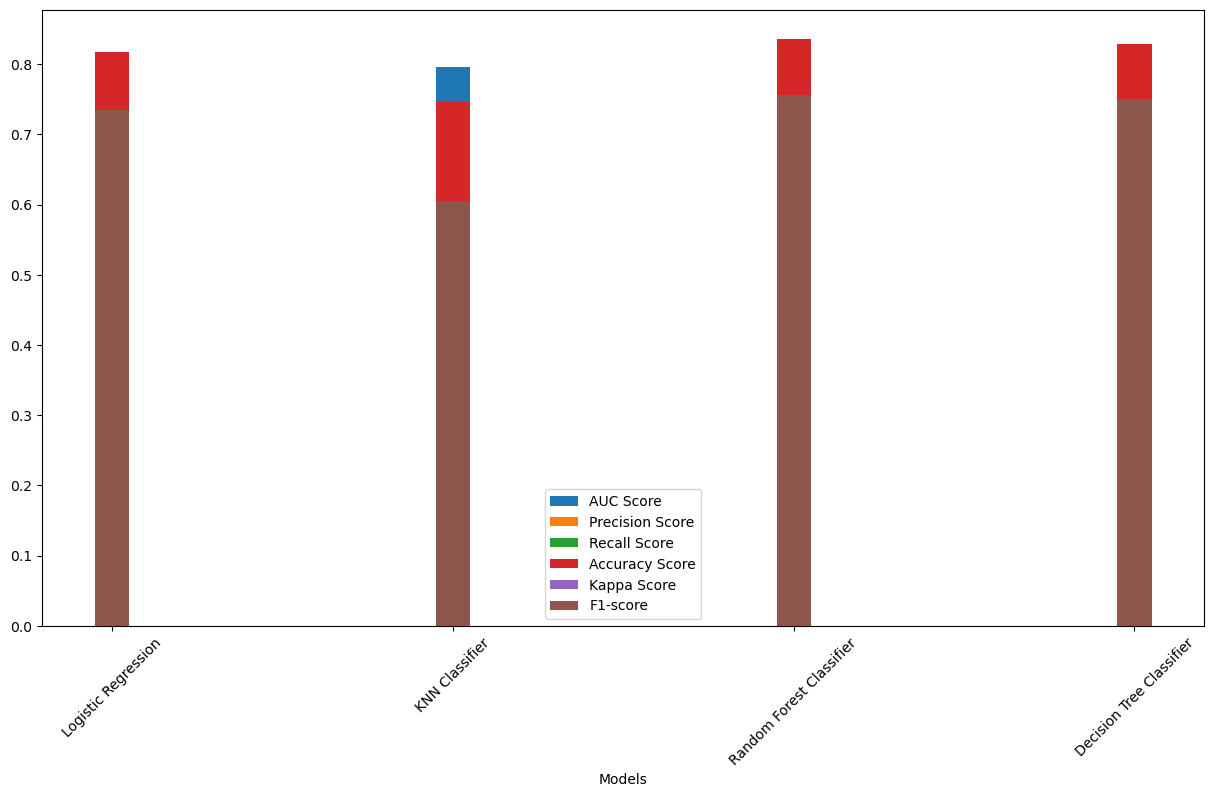

In [362]:
# Performance measures
models = ['Logistic Regression', 'KNN Classifier', 'Random Forest Classifier', 'Decision Tree Classifier']
auc_scores = [0.79561, 0.79561, 0.79561, 0.79561]
precision_scores = [0.747253, 0.666667, 0.790698, 0.766667]
recall_scores = [0.723404, 0.553191, 0.723404, 0.734043]
accuracy_scores = [0.817164, 0.746269, 0.835821, 0.828358]
kappa_scores = [0.595590, 0.420209, 0.632327, 0.619412]
f1_scores = [0.735135, 0.604651, 0.755556, 0.750000]

# Set the positions of the bars on the x-axis
x = range(len(models))

# Set the width of each bar
bar_width = 0.1

# Plot the bars
plt.bar(x, auc_scores, width=bar_width, label='AUC Score')
plt.bar(x, precision_scores, width=bar_width, label='Precision Score')
plt.bar(x, recall_scores, width=bar_width, label='Recall Score')
plt.bar(x, accuracy_scores, width=bar_width, label='Accuracy Score')
plt.bar(x, kappa_scores, width=bar_width, label='Kappa Score')
plt.bar(x, f1_scores, width=bar_width, label='F1-score')

# Add x-axis ticks and labels
plt.xlabel('Models')
plt.xticks(x, models, rotation=45)

# Add a legend
plt.legend()

# Display the plot
plt.show()
#This code will generate a grouped bar plot with each performance measure represented by a separate bar, grouped by the four models. Remember to adjust the bar width, labels, and other customization options as per your requirements.






